In [109]:
import json
import os
import jmespath
import io
from PIL import Image  # Pillow
from base64 import b64decode
import pandas as pd
from collections import OrderedDict

In [110]:
DATA_DIR = "data"
CLEAN_DIR = os.path.join(DATA_DIR, "clean")
CATEGORIES = {s[:s.index(".")].replace('__', '/'): 
              os.path.join(CLEAN_DIR, s) 
              for s in os.listdir(CLEAN_DIR)}
for k in CATEGORIES:
    print(k)

bouncy techno
minimal house
witch house
techno
baltimore club
dub poetry
forest
dubstyle
tribal house
electronic body music
disco polo
grindie
brostep
new rave
dream trance
kwaito
eurobeat
bhangragga
reggaestep
techdombe
bitpop
breakstep
acid jazz
chillwave
nortec
progressive
nu-gaze
grime
big beat
electronicore
florida breaks
progressive house
dark
dutch house
electro-industrial
4-beat
breakbeat hardcore
electropunk
broken beat
lento violento
deep house
funkstep
euro-trance
contemporary r&b
space disco
hardvapour
psychedelic trance
freestyle music
cybergrind
hard house
nintendocore
drill
darkstep
tech trance
indietronica
jersey club
diva house
breakcore
boogie
dark wave
uk funky
synth-pop
gabber
future bass
electro house
fidget house
frenchcore
hi-nrg
dancehall
hardbass
progressive trance
minimal techno
dance-rock
uplifting trance
italo disco
dance-punk
g-funk
musique concrète
al jeel
neurohop
jumpstyle
crunkcore
drum and bass
downtempo
italo house
hard nrg
video game music
hardtek//

In [111]:
def jsonl_reader(file_path):
    with open(file_path, 'r') as fp:
        for line in fp:
            yield json.loads(line)
            
            
def load_serps(k):
    path = os.path.join(CLEAN_DIR, k.replace('__', "/") + ".jsonl")
    return list(jsonl_reader(path))


def as_img(b64_data):
    return Image.open(io.BytesIO(b64decode(b64_data)))

In [144]:
data = load_serps('eurodance')

In [145]:
query = """{
    title: snippet.title,
    desc: snippet.description,
    channel_title: snippet.channelTitle,
    published_at: snippet.publishedAt,
    
    was_live: snippet.liveBroadcastContent,
    is_captioned: contentDetails.caption,
    vid_definition: contentDetails.definition,
    duration: contentDetails.duration,
    is_licensed: contentDetails.licensedContent,
    
    serp_pos: serp_pos,
    n_dislikes: statistics.dislikeCount,
    n_favs: statistics.favoriteCount,
    n_views: statistics.viewCount,
    n_likes: statistics.likeCount,
    n_comments: statistics.commentCount
}
"""
NORMALIZER = jmespath.compile(query)


def transform(item):
    d = NORMALIZER.search(item, jmespath.Options(dict_cls=OrderedDict))
    for k, v in d.items():
        if k.startswith('n'):
            d[k] = int(v)
    return d

In [168]:
transform(data[4])

OrderedDict([('title', "Remember The 90's - Eurodance Classic"),
             ('desc',
              "THE ROCK - Actors Then and Now: https://www.youtube.com/watch?v=E7WAgWWwQoU&list=PLisNxYKbqGALo91jk18l7su_PuqfTb3M3&index=53\nSPEED - Actors Then and Now: https://www.youtube.com/watch?v=qsxDfzKzuT8&list=PLisNxYKbqGALo91jk18l7su_PuqfTb3M3&index=52\nFINAL DESTINATION - Actors Then and Now: https://www.youtube.com/watch?v=zxNrfJV39w4&index=51&list=PLisNxYKbqGALo91jk18l7su_PuqfTb3M3 Open description ↓↓↓\n\nRemember The 90's - Eurodance Classic\nTracklist:\n01. Flash - In The Middle Of The Night 00:03 \n02. Unlimited Nation - Move Your Body 03:58 \n03. Jesse Lee Davis - Like A Flame 07:34 \n04. Basic Element - Leave It Behind 11:34 \n05. Da Blitz - Stay With Me 15:17 \n06. Indra - Anywhere 19:26 \n07. Loc 8 - Message On Air 24:18 \n08. S.E.X. Appeal - Fragile Love 27:43 \n09. Yoly - To France 31:34 \n10. Alexia - Me And You 35:04 \n11. Elektra - Dancing Through The Night 39:05 \n12. Ancora

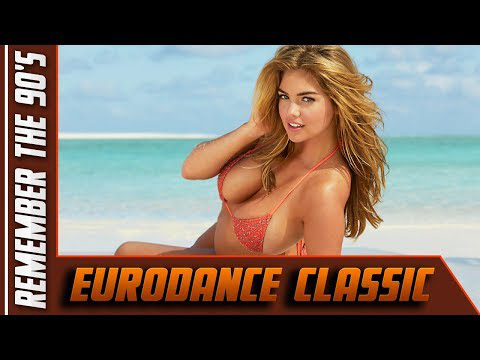

In [167]:
as_img(data[4]['img_data'])